# Exercises for Introduction to Quantum Computing

Name: Pugazharasu Anancia Devaneyan (s6puanan) <br />
Matriculation number: 3300280

In [3]:
import numpy as np
import qiskit as qi
import qiskit.quantum_info as quantu_info
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, execute
import math
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

## 1. Phase estimation algorithm

The unitary that we have is given by,
$$U = Z \otimes S$$
thus, their eigenvalues and eigenvectors must simply be the respective products, thus we have the eigenvalues given by 
$$\lambda_{1} = -i, \lambda_{2} = i, \lambda_{3} = -1, \lambda_{4} = 1$$
and their respective eigenvectors
$$v_{1} = \begin{pmatrix}
0 \\
1
\end{pmatrix} \otimes \begin{pmatrix}
0 \\
1
\end{pmatrix}, v_{2} = \begin{pmatrix}
1 \\
0
\end{pmatrix} \otimes \begin{pmatrix}
0 \\
1
\end{pmatrix}, v_{3} = \begin{pmatrix}
0 \\
1
\end{pmatrix} \otimes \begin{pmatrix}
1 \\
0
\end{pmatrix}, v_{4} = \begin{pmatrix}
0 \\
1
\end{pmatrix} \otimes \begin{pmatrix}
0 \\
1
\end{pmatrix}$$

b) What is the minimal number of qubits t in the first register that is required to exactly
measure the eigenvalues (2 points)?


To represent a phase $\phi$ exactly by means of a $t-bit$ binary number as follows,
$$\varphi=\frac{\varphi_1}{2}+\frac{\varphi_2}{4}+\ldots+\frac{\varphi_t}{2^{t}}$$
here, $\varphi_i \in\{0,1\}$ 
In our case, we computed the eigenvalues exacly and found them to lie in the set
$$\{1,-1, i,-i \}$$ 
these can be represented as 
$$e^{2\pi i  \phi}$$
where, the phase 
$$\phi \in \Big \{ 0,\frac{1}{4},\frac{1}{2},\frac{3}{4} \Big \} $$
These can be represented using a $t=2$ bit binary number. Thus, $t=2$ is the minimal number of qubits required in the first register to exactly represent the eigenvalues.

Now, we can define the circuit . We begin by defining the unitary in Qiskit

In [2]:
def unitary(control_qubit,t):
    test.cz(control_qubit,t)
    test.cs(control_qubit,t+1)

Now we define the circuit

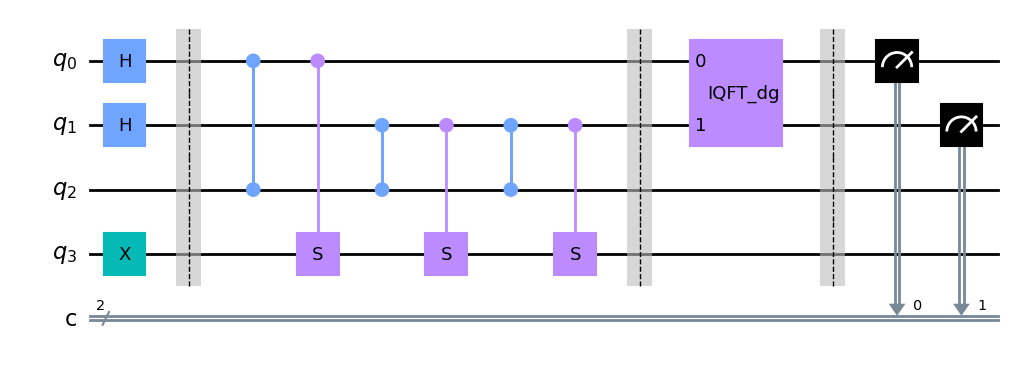

In [11]:
t = 2
#initializing the circuit and the state
test = QuantumCircuit(t+2,t)
test.x(t+1)

for i in range(t):
    test.h(i)
test.barrier()

repeats = 1
for control_qubit in range(t):
    for i in range(repeats):
        unitary(control_qubit,t)
    repeats *= 2
test.barrier()

test = test.compose(QFT(t, inverse=True), np.linspace(0,t-1,t,dtype=int))
#test = test.compose(QFT(t, inverse=True), [0,1])

test.barrier()
for n in range(t):
    test.measure(n,n)

test.draw('mpl')

We can simulate the outcome of the circuit in Qiskit

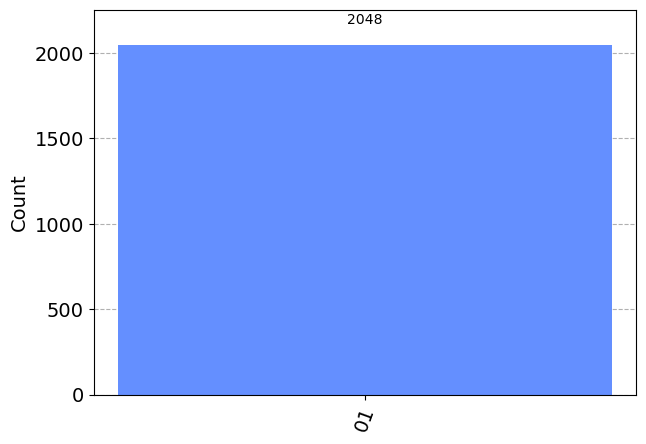

In [12]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(test, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

This states that the 

In [15]:
def unitary(control_qubit,t):
    qpe_2.cz(control_qubit,t)
    qpe_2.cs(control_qubit,t+1)

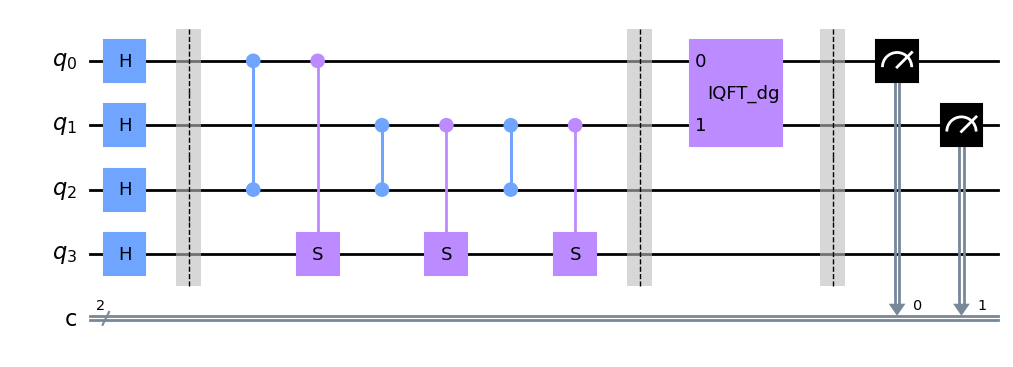

In [19]:
t = 2
#initializing the circuit and the state
qpe_2 = QuantumCircuit(t+2,t)
qpe_2.h(t)
qpe_2.h(t+1)

for i in range(t):
    qpe_2.h(i)
qpe_2.barrier()

repeats = 1
for control_qubit in range(t):
    for i in range(repeats):
        unitary(control_qubit,t)
    repeats *= 2
qpe_2.barrier()

qpe_2 = qpe_2.compose(QFT(t, inverse=True), np.linspace(0,t-1,t,dtype=int))
#test = test.compose(QFT(t, inverse=True), [0,1])

qpe_2.barrier()
for n in range(t):
    qpe_2.measure(n,n)

qpe_2.draw('mpl')

In [23]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe_2, aer_sim)
result = aer_sim.run(t_qpe, shots=shots).result()
results = result.get_counts()
display(results)
#answer = results.get_counts()

{'00': 496, '11': 497, '01': 523, '10': 532}

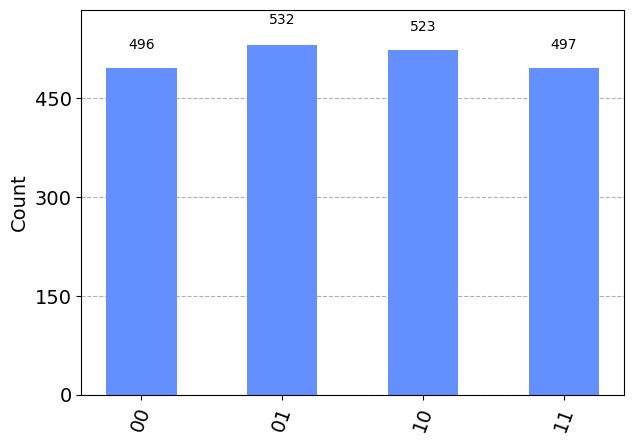

In [25]:
NQ_odering = {}
for q0 in range(2):
    for q1 in range(2):
            myin = str(q1) + str(q0)
            myout = str(q0) + str(q1)
            age = results.get(myin)
            if age:
                NQ_odering[myout] = results[myin]
            else:
                results[myin] = 0
                NQ_odering[myout] = results[myin]
plot_histogram(NQ_odering)
#plot_histogram(answer)

qpe_3

In [1]:
def unitary(control_qubit,t):
    qpe_3.cz(control_qubit,t)
    qpe_3.cs(control_qubit,t+1)

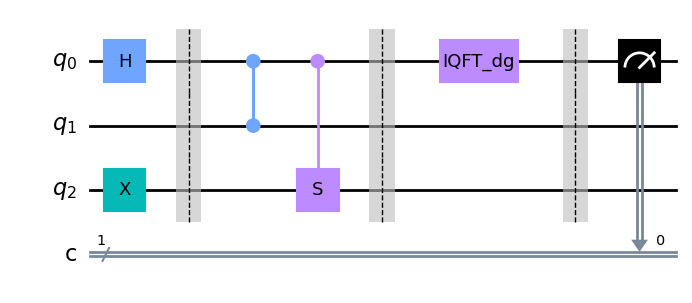

In [4]:
t = 1
#initializing the circuit and the state
qpe_3 = QuantumCircuit(t+2,t)
qpe_3.x(t+1)

for i in range(t):
    qpe_3.h(i)
qpe_3.barrier()

repeats = 1
for control_qubit in range(t):
    for i in range(repeats):
        unitary(control_qubit,t)
    repeats *= 2
qpe_3.barrier()

qpe_3 = qpe_3.compose(QFT(t, inverse=True), np.linspace(0,t-1,t,dtype=int))
#test = test.compose(QFT(t, inverse=True), [0,1])

qpe_3.barrier()
for n in range(t):
    qpe_3.measure(n,n)

qpe_3.draw('mpl')

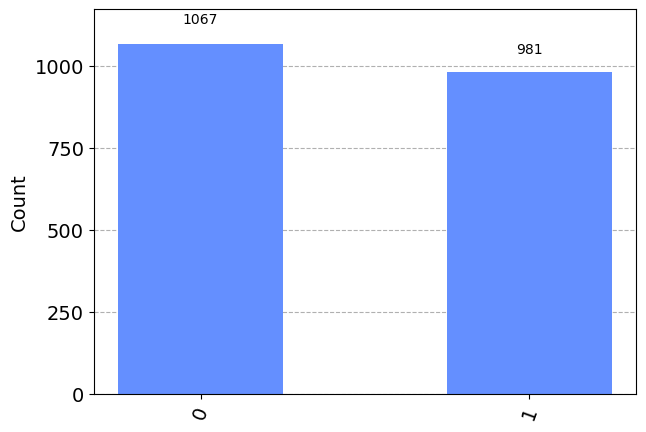

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe_3, aer_sim)
result = aer_sim.run(t_qpe, shots=shots).result()
results = result.get_counts()
plot_histogram(results)